In [10]:
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear  
# inline in the notebook rather than in a new window.
%matplotlib inline

# set default size of plots
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# scikit-image + matplotlib

In [11]:
from skimage import io
image = io.imread('./datasets/images/panamera.jpg')

In [12]:
# (height, width, channels)
image.shape

(525, 700, 3)

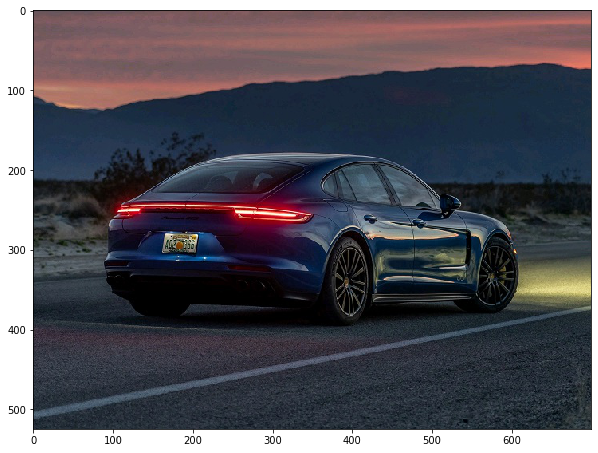

In [13]:
# skimage use RGB mode
# matplotlib use RGB mode
plt.imshow(image)

In [14]:
# accesses RGB pixel at x = 100, y = 500
(r, g, b) = image[500, 100]

In [15]:
(r, g, b)

(19, 28, 37)

# opencv + matplotlib

In [16]:
import cv2
image = cv2.imread("./datasets/images/panamera.jpg")

In [17]:
# (height, width, channels)
image.shape

(525, 700, 3)

In [18]:
# accesses BGR pixel at x = 100, y = 500
(b, g, r) = image[500, 100]

In [19]:
(b, g, r)

(37, 28, 19)

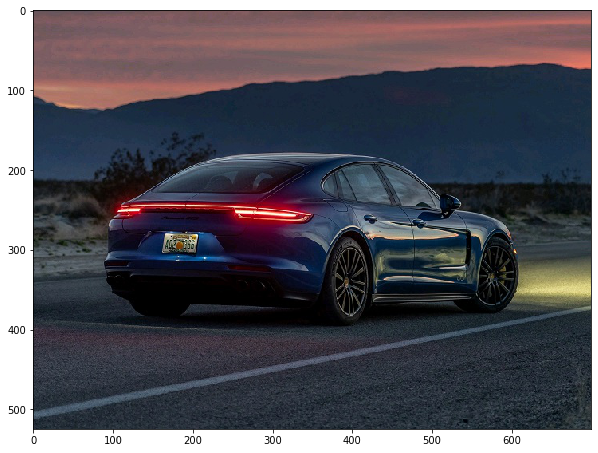

In [20]:
# OpenCV use BGR mode
# matplotlib use RGB mode
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# Image Pyramids

An image pyramid is a **multi-scale** representation of an image. At each layer of the pyramid the image is downsized and (optionally) smoothed. At the bottom of the pyramid we have the original image at its original size (in terms of width and height). And at each subsequent layer, the image is **resized (subsampled)** and **optionally smoothed (usually via Gaussian blurring)**. The image is progressively subsampled until some stopping criterion is met, which is normally a minimum size has been reached and no further subsampling needs to take place.

![caption](images/pyramid.png)

## Image Pyramids with Python and OpenCV

In [37]:
def pyramid(image, scale=1.5, minSize=(30, 30)):
    # image - OpenCV Image (BGR mode)
    # minSize = (width, height)
    
    # yield the original image
    yield image
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        height, width, dim = image.shape
        height, width = int(height / scale), int(width / scale)
        image = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image

pyramid shape = (525, 700, 3)
pyramid shape = (262, 350, 3)
pyramid shape = (131, 175, 3)
pyramid shape = (65, 87, 3)
pyramid shape = (32, 43, 3)


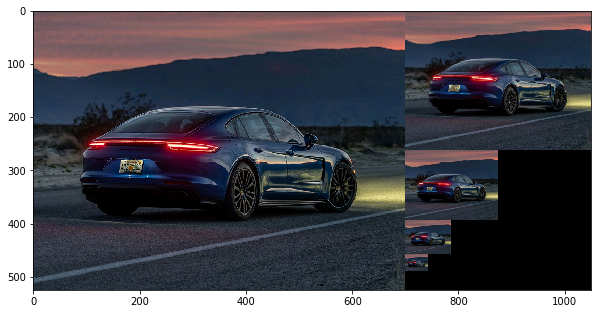

In [41]:
import numpy as np

image = cv2.imread("./datasets/images/panamera.jpg")
rows, cols, dim = image.shape

# No smooth, just scaling.
# loop over the image pyramid
pyramid_image = tuple(pyramid(image, scale=2, minSize=(20, 20)))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid_image[0]
print('pyramid shape = ' + str(pyramid_image[0].shape))

i_row = 0
for p in pyramid_image[1:]:
    print('pyramid shape = ' + str(p.shape))
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
composite_image = cv2.cvtColor(composite_image.astype('uint8'), cv2.COLOR_BGR2RGB)
ax.imshow(composite_image)
plt.show()

## Image Pyramids with Python and scikit-image

pyramid shape = (525, 700, 3)
pyramid shape = (263, 350, 3)
pyramid shape = (132, 175, 3)
pyramid shape = (66, 88, 3)
pyramid shape = (33, 44, 3)


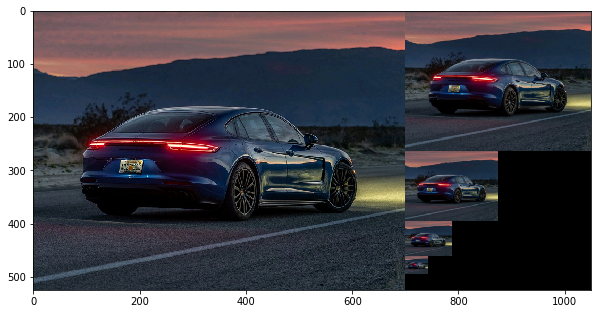

In [42]:
import numpy as np
from skimage.transform import pyramid_gaussian

image = io.imread('./datasets/images/panamera.jpg')
rows, cols, dim = image.shape

# Resizing and Gaussian smoothing.
pyramid = tuple(pyramid_gaussian(image, max_layer=4, downscale=2, multichannel=True))

composite_image = np.zeros((rows, cols + cols // 2, 3), dtype=np.double)

composite_image[:rows, :cols, :] = pyramid[0]
print('pyramid shape = ' + str(pyramid_image[0].shape))

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    print('pyramid shape = ' + str(p.shape))
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p
    i_row += n_rows

fig, ax = plt.subplots()
ax.imshow(composite_image)
plt.show()